# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [13]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv', sep=',')

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv', sep=',')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [5]:
apple.Date = apple.Date.astype('datetime64[ns]')

### Step 6.  Set the date as the index

In [6]:
apple = apple.set_index('Date')

### Step 7.  Is there any duplicate dates?

In [7]:
apple.index.duplicated().sum()

np.int64(0)

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [8]:
apple = apple.sort_values(by=['Date'], ascending=True)

### Step 9. Get the last business day of each month

In [9]:
def find_date(x):
    change_dates = []
    for i in range(len(x.index) - 1):
        if x.index[i].month != x.index[i+1].month:
            change_dates.append(x.index[i])
    return change_dates

change_dates = find_date(apple)
apple.loc[change_dates]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83


### Step 10.  What is the difference in days between the first day and the oldest

In [10]:
apple.tail(1).index - apple.head(1).index

TimedeltaIndex(['12261 days'], dtype='timedelta64[ns]', name='Date', freq=None)

### Step 11.  How many months in the data we have?

In [11]:
def check_month(x):
    count = 1
    for i in range(len(x.index) - 1):
        if x.index[i].month != x.index[i+1].month:
            count += 1
    return count

check_month(apple)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<Axes: xlabel='Date', ylabel='Adj Close'>

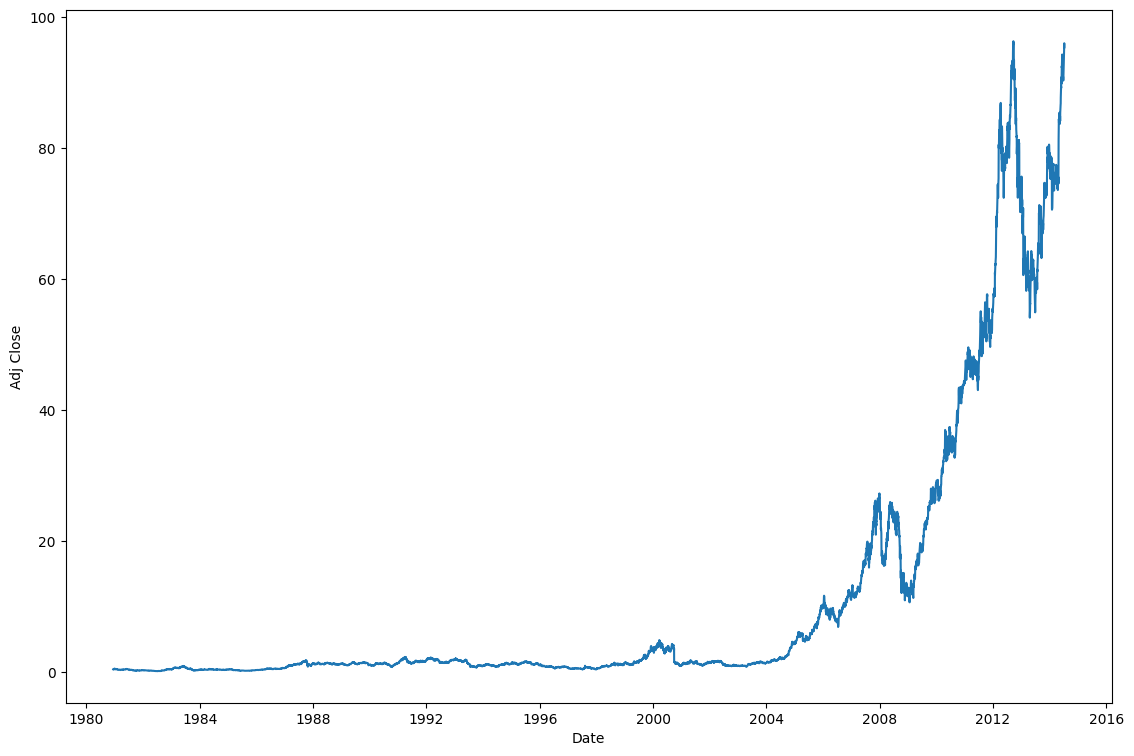

In [18]:
plt.figure(figsize=(13.5, 9))
sns.lineplot(data=apple['Adj Close'])

### BONUS: Create your own question and answer it.